In [19]:
import numpy as np
import matplotlib.pyplot as plt

def trimf(x, a, b, c):
    x = np.asarray(x, dtype=float)
    esquerda = (x - a) / (b - a + 1e-10)
    direita = (c - x) / (c - b + 1e-10)
    return np.maximum( 0, np.minimum(esquerda, direita))

def plot_mf(universo, mfs: dict, title="Funções de Pwertinencia"):
    plt.figure(figsize=(6, 3))
    
    for name, mf in mfs.items():
        plt.plot(universo, mf, label=name)
        
    plt.ylim(0.05, 1.05)
    plt.title(title)
    plt.xlabel("Universo")
    plt.ylabel("u")
    plt.legend()
    plt.grid(alpha=0.25)
    plt.show

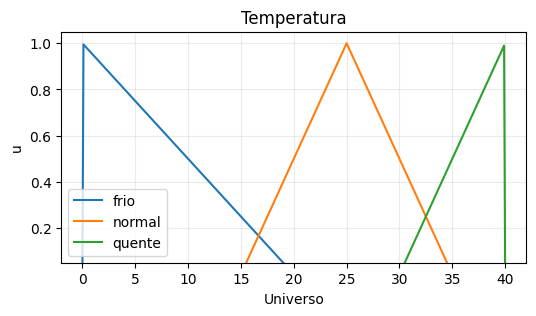

In [20]:
T = np.linspace(0,40,401)

mfs_T = {
    "frio": trimf(T, 0, 0, 20),
    "normal": trimf(T, 15, 25, 35),
    "quente": trimf(T, 30, 40, 40)
}

plot_mf(T, mfs_T, "Temperatura")

In [21]:
mu = {k: np.interp(16, T, v) for k, v in mfs_T.items()}
mu

{'frio': np.float64(0.199999999999),
 'normal': np.float64(0.099999999999),
 'quente': np.float64(0.0)}

Se estiver quente -> Potencia alta
se estiver normal -> Potencia média
se estiver frio   -> Potencia baixa

Então baixo, medio, alto

{'frio': np.float64(0.0),
 'normal': np.float64(0.499999999995),
 'quente': np.float64(0.0)}

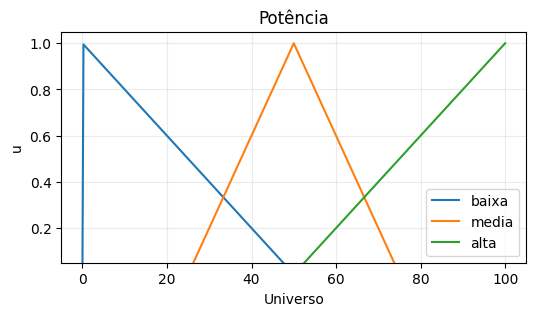

In [23]:
S = np.linspace(0, 100, 401)

mfs_S = {
    'baixa': trimf(S, 0, 0, 50),
    'media': trimf(S, 25, 50, 75),
    'alta': trimf(S, 50, 100, 101)
}

plot_mf(S, mfs_S, "Potência")

T0 = 20

mu = {k: np.interp(T0, T, v) for k, v in mfs_T.items()}

disparo = {
    'baixa': mu['frio'],
    'media': mu['normal'],
    'alta': mu['quente']
}

mu